In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
df = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/chungcu_eng.csv")

df_columns = df.columns.tolist() 
print("+ Shape: ", df.shape) # (Number of Lines, Number of Columns)
print("+ Column: ", df_columns) # Name the attribute columns.
df.info()

+ Shape:  (14953, 29)
+ Column:  ['Dự án', 'Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin', 'Mã tin', 'Diện tích', 'Mức giá', 'Hướng nhà', 'Hướng ban công', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất', 'Loại hình chung cư', 'Nhóm 1-Trường học', 'Nhóm 1-Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Nhóm 2-Công viên', 'Nhóm 2-Bể bơi', 'Nhóm 2-Gym', 'Slot ô tô', 'Nhà thoáng', 'Hiện đại', 'Bán gấp', 'Lô góc', 'Hỗ trợ vay', 'Tầng']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14953 entries, 0 to 14952
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dự án                14953 non-null  object 
 1   Đường/Phố            11552 non-null  object 
 2   Phường/Xã            14762 non-null  object 
 3   Quận/Huyện           14953 non-null  object 
 4   Phân loại quận       14953 non-null  object 
 5   Loại tin             14953 non-null  object 
 6   Mã tin               14953 non-null  

In [3]:
df

,Dự án,Đường/Phố,Phường/Xã,Quận/Huyện,Phân loại quận,Loại tin,Mã tin,Diện tích,Mức giá,Hướng nhà,...,Nhóm 2-Công viên,Nhóm 2-Bể bơi,Nhóm 2-Gym,Slot ô tô,Nhà thoáng,Hiện đại,Bán gấp,Lô góc,Hỗ trợ vay,Tầng
0,Golden Palace,Mễ Trì,Mễ Trì,Nam Từ Liêm,Nội thành,Tin thường,37587338,128.0,35.0,Tây - Bắc,...,0,0,0,1,1,0,0,0,1,Trung
1,CT5 Văn Khê,NaN,La Khê,Hà Đông,Nội thành,Tin thường,39014297,82.0,32.3,Tây - Bắc,...,0,0,0,0,0,0,0,0,0,NaN
2,Diamond Flower Tower,Hoàng Đạo Thúy,Nhân Chính,Thanh Xuân,Nội thành,Tin thường,39135117,115.0,55.0,Nam,...,0,0,0,1,1,1,1,0,0,NaN
3,Sun Grand City,Thụy Khuê,Thụy Khuê,Tây Hồ,Nội thành,Tin thường,37509440,250.0,96.0,NaN,...,1,1,1,0,1,1,0,0,0,NaN
4,Vinhomes West Point,Phạm Hùng,Mễ Trì,Nam Từ Liêm,Nội thành,Tin thường,39159735,93.0,69.9,Tây - Bắc,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14948,Chung cư mini Đường Minh Khai,Minh Khai,Mai Động,Hoàng Mai,Nội thành,Tin thường,39206578,50.0,Thỏa thuận,NaN,...,0,0,0,0,1,0,0,0,0,NaN
14949,6th Element,NaN,Xuân La,Tây Hồ,Nội thành,Tin thường,39178538,82.4,Thỏa thuận,NaN,...,0,0,0,0,1,0,0,0,0,NaN
14950,Vinhomes D'Capitale,Trần Duy Hưng,Trung Hòa,Cầu Giấy,Nội thành,Tin thường,39183034,73.0,68.5,Tây - Bắc,...,0,0,0,0,0,0,0,0,0,NaN
14951,Times City,Minh Khai,Vĩnh Tuy,Hai Bà Trưng,Nội thành,Tin thường,36361390,83.0,55.4,Nam,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
df.isnull().sum()/df.shape[0] * 100.00

Dự án                   0.000000
Đường/Phố              22.744600
Phường/Xã               1.277336
Quận/Huyện              0.000000
Phân loại quận          0.000000
Loại tin                0.000000
Mã tin                  0.000000
Diện tích               0.000000
Mức giá                 0.000000
Hướng nhà              50.819234
Hướng ban công         46.157962
Số phòng ngủ            2.942553
Số toilet               7.864643
Pháp lý                 0.000000
Nội thất                0.000000
Loại hình chung cư      0.000000
Nhóm 1-Trường học       0.000000
Nhóm 1-Chợ/Siêu thị     0.000000
Nhóm 1-Bệnh viện        0.000000
Nhóm 2-Công viên        0.000000
Nhóm 2-Bể bơi           0.000000
Nhóm 2-Gym              0.000000
Slot ô tô               0.000000
Nhà thoáng              0.000000
Hiện đại                0.000000
Bán gấp                 0.000000
Lô góc                  0.000000
Hỗ trợ vay              0.000000
Tầng                   77.101585
dtype: float64

In [5]:
columns_to_drop = ['Loại tin', 'Mã tin', 'Hướng nhà', 'Hướng ban công', 'Nội thất', 'Tầng']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14953 entries, 0 to 14952
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dự án                14953 non-null  object 
 1   Đường/Phố            11552 non-null  object 
 2   Phường/Xã            14762 non-null  object 
 3   Quận/Huyện           14953 non-null  object 
 4   Phân loại quận       14953 non-null  object 
 5   Diện tích            14953 non-null  float64
 6   Mức giá              14953 non-null  object 
 7   Số phòng ngủ         14513 non-null  float64
 8   Số toilet            13777 non-null  float64
 9   Pháp lý              14953 non-null  object 
 10  Loại hình chung cư   14953 non-null  object 
 11  Nhóm 1-Trường học    14953 non-null  int64  
 12  Nhóm 1-Chợ/Siêu thị  14953 non-null  int64  
 13  Nhóm 1-Bệnh viện     14953 non-null  int64  
 14  Nhóm 2-Công viên     14953 non-null  int64  
 15  Nhóm 2-Bể bơi        14953 non-null 

In [6]:
# Fill NaN
df['Phường/Xã'].fillna(df['Phường/Xã'].mode()[0], inplace=True)
df['Đường/Phố'].fillna(df['Đường/Phố'].mode()[0], inplace=True)

numeric_cols = ['Diện tích', 'Số phòng ngủ', 'Số toilet']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

phuongloai_mapping = {'Nội thành': 1, 'Ngoại thành': 0}
df['Phân loại quận'] = df['Phân loại quận'].map(phuongloai_mapping)

# One-Hot Encoding 
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['Quận/Huyện']]).toarray()
onehot_encoded_df = pd.DataFrame(onehot_encoded, 
                                 columns=onehot_encoder.get_feature_names_out(['Quận/Huyện']), 
                                 dtype=bool)
onehot_encoded_df = onehot_encoded_df * 1

onehot_encoder_phap_ly = OneHotEncoder()
phap_ly_encoded = onehot_encoder_phap_ly.fit_transform(df[['Pháp lý']]).toarray()
phap_ly_encoded_df = pd.DataFrame(phap_ly_encoded, 
                                  columns=onehot_encoder_phap_ly.get_feature_names_out(['Pháp lý']), 
                                  dtype=bool)
phap_ly_encoded_df = phap_ly_encoded_df * 1

onehot_encoder_loai_hinh_cc = OneHotEncoder()
loai_hinh_cc_encoded = onehot_encoder_loai_hinh_cc.fit_transform(df[['Loại hình chung cư']]).toarray()
loai_hinh_cc_encoded_df = pd.DataFrame(loai_hinh_cc_encoded, 
                                        columns=onehot_encoder_loai_hinh_cc.get_feature_names_out(['Loại hình chung cư']), 
                                        dtype=bool)
loai_hinh_cc_encoded_df = loai_hinh_cc_encoded_df * 1

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=['Quận/Huyện'], inplace=True)

df = pd.concat([df, phap_ly_encoded_df], axis=1)
df.drop(columns=['Pháp lý'], inplace=True)

df = pd.concat([df, loai_hinh_cc_encoded_df], axis=1)
df.drop(columns=['Loại hình chung cư'], inplace=True)

# Label Encoding 
label_encoder_px = LabelEncoder()
df['Phường/Xã'] = label_encoder_px.fit_transform(df['Phường/Xã'].str.replace("Phường ", ""))
df['Đường/Phố'] = label_encoder_px.fit_transform(df['Đường/Phố'].str.replace("Đường ", ""))
df['Dự án'] = label_encoder_px.fit_transform(df['Dự án'])

print(df)

       Dự án  Đường/Phố  Phường/Xã  Phân loại quận  Diện tích     Mức giá  \
0        445        221         64               1      128.0        35.0   
1         83        392         49               1       82.0        32.3   
2        392        152         81               1      115.0        55.0   
3        858        343        129               1      250.0        96.0   
4       1005        307         64               1       93.0        69.9   
...      ...        ...        ...             ...        ...         ...   
14948    257        217         62               1       50.0  Thỏa thuận   
14949     20        392        166               1       82.4  Thỏa thuận   
14950    994        359        131               1       73.0        68.5   
14951    944        217        155               1       83.0        55.4   
14952    868        392         91               1      100.0        55.0   

       Số phòng ngủ  Số toilet  Nhóm 1-Trường học  Nhóm 1-Chợ/Siêu thị  ...

In [7]:
# Remove rows with "Thỏa thuận" price
df_processed = df[df['Mức giá'] != 'Thỏa thuận'].copy()

# Select features and target columns
X = df_processed.drop(columns=['Mức giá'])
y = df_processed['Mức giá'].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11046, 49) (11046,) (1228, 49) (1228,)


In [8]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict prices for rows with "Thỏa thuận" price
df_thoa_thuan = df[df['Mức giá'] == 'Thỏa thuận']
X_thoa_thuan = df_thoa_thuan.drop(columns=['Mức giá'])

# Predict prices
predicted_prices = model.predict(X_thoa_thuan)

In [9]:
# Replace "Thỏa thuận" prices with predicted values
df.loc[df['Mức giá'] == 'Thỏa thuận', 'Mức giá'] = predicted_prices

df

,Dự án,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Số phòng ngủ,Số toilet,Nhóm 1-Trường học,Nhóm 1-Chợ/Siêu thị,...,Quận/Huyện_Đống Đa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ,Loại hình chung cư_Chung cư,Loại hình chung cư_Chung cư mini,Loại hình chung cư_Nhà tập thể
0,445,221,64,1,128.0,35.0,3.0,2.000000,0,0,...,0,0,1,0,0,0,0,1,0,0
1,83,392,49,1,82.0,32.3,2.0,2.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
2,392,152,81,1,115.0,55.0,3.0,2.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
3,858,343,129,1,250.0,96.0,4.0,3.000000,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1005,307,64,1,93.0,69.9,3.0,2.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14948,257,217,62,1,50.0,19.079,2.0,1.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
14949,20,392,166,1,82.4,69.604,2.0,1.967772,0,0,...,0,0,1,0,0,0,0,1,0,0
14950,994,359,131,1,73.0,68.5,2.0,2.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
14951,944,217,155,1,83.0,55.4,2.0,2.000000,0,0,...,0,0,0,0,1,0,0,1,0,0


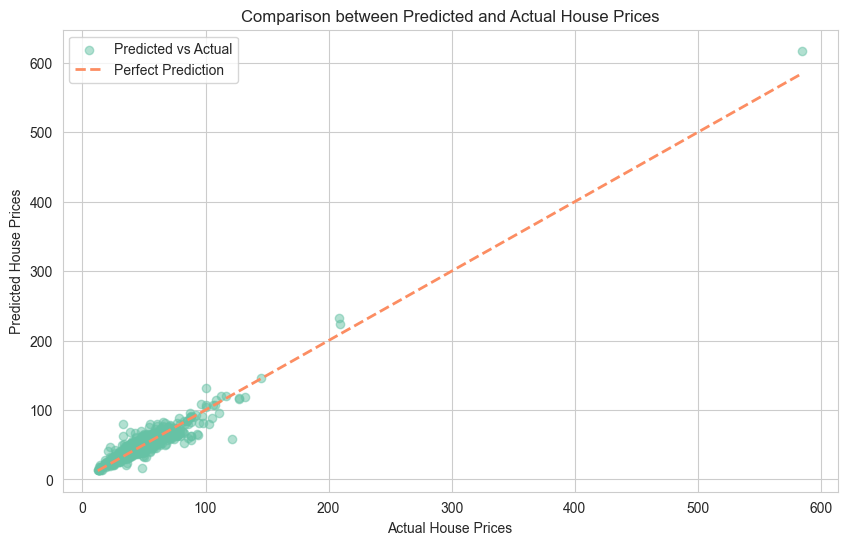

In [10]:
# Predict house prices
predicted_prices = model.predict(X_test)

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()

In [11]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate R^2 score
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 6.534780973226359
MAE: 4.068994128939286
R^2: 0.9202356691381315


Tuning

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 7.2950402135905295
MAE: 4.64873117597432
R^2: 0.900596417861417


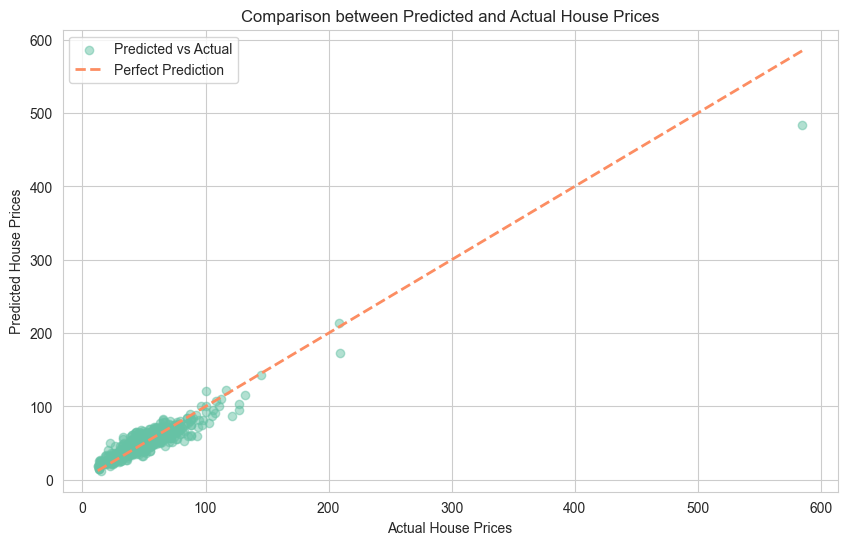

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict house prices using the best model
predicted_prices = best_model.predict(X_test)

# Calculate RMSE, MAE, and R^2
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
mae = mean_absolute_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()